<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/Spam_Email_Classification_(Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import files
from joblib import dump, load

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nazneenakram","key":"08d579900181a0e53c4bac39e23b069d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset
!kaggle datasets download -d purusinghvi/email-spam-classification-dataset

 33% 14.0M/43.0M [00:00<00:00, 143MB/s]
100% 43.0M/43.0M [00:00<00:00, 232MB/s]


In [5]:
# Unzip the file
!unzip \*.zip  && rm *.zip

# List files in the current directory
!ls

Archive:  email-spam-classification-dataset.zip
replace combined_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
 combined_data.csv  'kaggle (1).json'   kaggle.json   sample_data


In [6]:
df = pd.read_csv('combined_data.csv' )
df.head(10)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
5,0,larry king live at escapenumber escapenumber p...
6,0,michael pobega wrote i'm not sure if it's the ...
7,0,hi i have this error tr sample escapenumber es...
8,1,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...


In [7]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 83448 rows and 2 columns.


In [8]:
df.info() # for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
spam_count = df['label'].groupby(df['label']).count() #distribution of spam(1) and not spam values(0) in a label column
spam_count

label
0    39538
1    43910
Name: label, dtype: int64

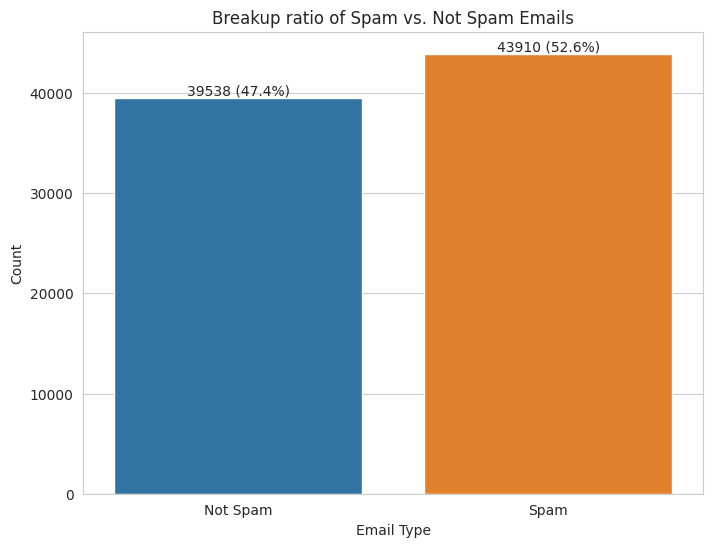

In [23]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.countplot(x='label', data=df)

# Labeling
plt.title('Breakup ratio of Spam vs. Not Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])

# Add count labels to the bars
for i, count in enumerate(spam_count):
    percentage = '{:.1f}%'.format(count / len(df)*100)
    plt.text(i,count, f'{count} ({percentage})', ha='center', va='bottom')

plt.show()

In [15]:
df.groupby(df['label']).describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538   computer connection from cnn com wednesday es...    1
1      43910  43910  ounce feather bowl hummingbird opec moment ala...    1

### Data Preprocessing and Preparation

In [16]:
# Checking for null values

df.isna().sum()

label    0
text     0
dtype: int64

In [18]:
# Check for duplicates
duplicates = df[df.duplicated()].sum()

# Display the duplicates
print("Duplicate Rows:")
print(duplicates)

# Remove duplicates
df = df.drop_duplicates(subset='text').reset_index(drop=True)

# Display the DataFrame without duplicates
print("\nDataFrame after removing duplicates:")
df

Duplicate Rows:
label    0.0
text     0.0
dtype: float64

DataFrame after removing duplicates:


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83441,0,hi given a date how do i get the last date of ...
83442,1,now you can order software on cd or download i...
83443,1,dear valued member canadianpharmacy provides a...
83444,0,subscribe change profile contact us long term ...


In [19]:
# Splitting the data into training (80%) and testing (20%)
x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
# Vectorize the text data of both x_train and x_test
vectorizer = TfidfVectorizer()
x_trained_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [26]:
# Training the Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(x_trained_vectorized, y_train)

RandomForestClassifier()

In [29]:
# Testing the metrics of the model
predictions = model.predict(x_test_vectorized)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.4f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.4f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.9824
Precision: 0.9833
Recall: 0.9836


In [52]:
# Testing the model with custom input
new_emails = ['Meeting is live now: A Practical Introduction to LLMs',
              'Invitation For Hi-Tea & Sales Event',
              'This offer is insane (proof)',
              '20 PERCENT OFF! 6 Weeks to Success: Fall 2023 Side Hustle Bootcamp',
              'Payments Received. Your first session on Dec 09, 2023',
              'You are registered for the PIAIC Program']

# Convert list to DataFrame
new_email_df = pd.DataFrame(new_emails, columns=['text'])
new_email_df

,text
0,Meeting is live now: A Practical Introduction ...
1,Invitation For Hi-Tea & Sales Event
2,This offer is insane (proof)
3,20 PERCENT OFF! 6 Weeks to Success: Fall 2023 ...
4,Payments Received. Your first session on Dec 0...
5,You are registered for the PIAIC Program


In [58]:
# Vectorize the new emails
new_email_vectorized = vectorizer.transform(new_email_df['text'])

# Predict the labels for the new emails
predictions = model.predict(new_email_vectorized)

# Replace the numerical labels with 'Spam' or 'Not Spam'
new_email_df['Prediction'] = ['Spam' if prediction == 1 else 'Not Spam' for prediction in predictions]

new_email_df

,text,Prediction
0,Meeting is live now: A Practical Introduction ...,Spam
1,Invitation For Hi-Tea & Sales Event,Spam
2,This offer is insane (proof),Spam
3,20 PERCENT OFF! 6 Weeks to Success: Fall 2023 ...,Spam
4,Payments Received. Your first session on Dec 0...,Spam
5,You are registered for the PIAIC Program,Not Spam


In [55]:
#Saving the Mode
dump(model, "clf_model.h5")

['clf_model.h5']

In [57]:
# Loading the saved model and making predictions

saved_model = load("clf_model.h5")

inp = ["loading the model and making predictions",
       "you won a lottery !", "Nothing is permanant",
        "hello, want a job ?"]

vectorized_inp = vectorizer.transform(inp)

print(vectorized_inp.shape)

saved_model.predict(vectorized_inp)

(4, 274243)


array([1, 1, 1, 1])